# Импорты

In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
from IPython.display import display

# 2.3 Тензоры PyTorch

In [4]:
data = np.array([1, 2, 3])

type(data)

o1 = torch.Tensor(data)
o2 = torch.tensor(data)
o3 = torch.as_tensor(data)
o4 = torch.from_numpy(data)

print(o1)
print(o2)
print(o3)
print(o4)

tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)


In [5]:
# Лучшие варианты для создания тензоров в PyTorch

# torch.tensor()
# torch.as_tensor()

# Вызов torch.tensor() является основным, 
# в то время как torch.as_tensor() следует использовать для повышения производительности.

# 2.4 Операции с тензорами

In [6]:
t = torch.tensor([
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [3, 3, 3, 3]
], dtype=torch.float32)
display(t)

print(t.reshape([1, 12]))
print(t.reshape([1, 12]).shape)

print(t.reshape([1, 12]).squeeze())
print(t.reshape([1, 12]).squeeze().shape)

print(t.reshape([1, 12]).squeeze().unsqueeze(dim=0))
print(t.reshape([1, 12]).squeeze().unsqueeze(dim=0).shape)

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])
tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])
tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


In [7]:
print(t.reshape(1, -1).squeeze())
print(t.flatten())

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])


In [8]:
t1 = torch.tensor([
    [1, 2],
    [3, 4]
])

t2 = torch.tensor([
    [5, 6],
    [7, 8]
])

print(torch.cat((t1, t2), dim=0))

torch.cat((t1, t2), dim=1)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

In [9]:
# Создание представления тензора для пакета изображений

t1 = torch.tensor([
    [1, 1, 1, 1],
    [1, 1, 1, 1],
    [1, 1, 1, 1],
    [1, 1, 1, 1]
])

t2 = torch.tensor([
    [2, 2, 2, 2],
    [2, 2, 2, 2],
    [2, 2, 2, 2],
    [2, 2, 2, 2]
])

t3 = torch.tensor([
    [3, 3, 3, 3],
    [3, 3, 3, 3],
    [3, 3, 3, 3],
    [3, 3, 3, 3]
])

t = torch.stack((t1, t2, t3))
t.shape

torch.Size([3, 4, 4])

In [10]:
t = t.reshape(3, 1, 4, 4)
t

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [11]:
# Разворачивание определенных осей тензора

t.flatten(start_dim=1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [12]:
# Разворачивание RGB изображения

r = torch.ones(1, 2, 2)
g = torch.ones(1, 2, 2) + 1
b = torch.ones(1, 2, 2) + 2

img = torch.cat((r, g, b), dim=0)

img

tensor([[[1., 1.],
         [1., 1.]],

        [[2., 2.],
         [2., 2.]],

        [[3., 3.],
         [3., 3.]]])

In [13]:
img.flatten(start_dim=1)

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])

In [ ]:
# Реализуйте функцию, которая принимает тензор продаж за неделю 
# и возвращает день с максимальными продажами и общие продажи за неделю.

def analyze_sales(sales):
    max_sales_day = sales.argmax().item()
    total_sales = sales.sum().item()
    return max_sales_day, total_sales

analyze_sales(torch.tensor([100, 200, 150, 300, 250, 400, 350]))

(5, 1750)

In [30]:
# Реализуйте функцию, которая принимает тензор весов спортсменов 
# и возвращает количество спортсменов с весом ниже среднего и стандартное отклонение весов.

def analyze_weights(weights):
    mean_weight = torch.mean(weights.float())
    std_dev = torch.std(weights.float()).item()
    count_below_average = torch.sum(weights < mean_weight).item()
    return count_below_average, std_dev

analyze_weights(torch.tensor([70, 80, 75, 85, 90, 65, 60]))

(3, 10.801234245300293)

In [40]:
# Создайте тензор 3x3 с целыми значениями от 0 до 10, 
# затем выведите его размерность, общее количество элементов и тип данных.

tns = torch.randint(0, 11, (3, 3))

print(tns.shape)
print(tns.numel())
print(tns.dtype)

torch.Size([3, 3])
9
torch.int64


In [ ]:
# Вам дан 4×4 тензор с числами от 1 до 16 (включительно). 
# Реализуйте функцию, которая вычисляет сумму, среднее 
# и стандартное отклонение по каждому столбцу (то есть вдоль первой оси).

def compute_reductions(t):
    column_sums = torch.LongTensor(np.sum(t.numpy(), axis=0))
    column_means = torch.LongTensor(np.mean(t.numpy(), axis=0))
    column_stds = torch.LongTensor(np.std(t.numpy(), axis=0))
    return column_sums, column_means, column_stds

compute_reductions(torch.arange(1, 17).reshape(4, 4))

(tensor([28, 32, 36, 40]), tensor([ 7,  8,  9, 10]), tensor([4, 4, 4, 4]))

In [85]:
# Вам дан тензор размером 5×5 с целыми числами. Реализуйте функцию, 
# которая извлекает подматрицу из второго и третьего ряда и второго и третьего столбца.

def extract_subtensor(t):
    sub = t[1:3, 1:3]
    return sub

extract_subtensor(torch.randint(0, 10, (5, 5), generator=torch.manual_seed(0)))

tensor([[7, 3],
        [6, 6]])

In [122]:
# Создайте тензор от -4 до 4 включительно (3×3). 
# Реализуйте функцию, которая возвращает: 
# (1) абсолютные значения, 
# (2) квадратные корни от положительных значений, 
# (3) отрицания всех элементов.

def apply_math_ops(t):
    abs_t = torch.abs(t)
    sqrt_t = torch.sqrt((t[t >= 0]).float())
    neg_t = torch.neg(t)
    return abs_t, sqrt_t, neg_t

t = torch.arange(-4, 5).reshape(3, 3)

apply_math_ops(t)

(tensor([[4, 3, 2],
         [1, 0, 1],
         [2, 3, 4]]),
 tensor([0.0000, 1.0000, 1.4142, 1.7321, 2.0000]),
 tensor([[ 4,  3,  2],
         [ 1,  0, -1],
         [-2, -3, -4]]))

In [130]:
# Создайте тензор на CPU, переместите его на GPU (если доступен) и проверьте устройство до и после перемещения.

def move_to_device(t):
    before = t
    after = t.to('cuda')
    return before, after

a = torch.tensor([1, 2, 3])
move_to_device(a)

(tensor([1, 2, 3]), tensor([1, 2, 3], device='cuda:0'))

In [145]:
t = torch.tensor([1, 2, 3])
t.device

device(type='cpu')

In [147]:
t = t.to(device='cuda')
t.device

device(type='cuda', index=0)

# 3.1  Работа с данными (Fashion-MNIST)

In [ ]:
# Fashion-MNIST создан как замена MNIST. Набор данных разработан так, чтобы максимально соответствовать оригинальному MNIST, но с более сложными данными.

# Оба набора данных имеют по 10 классов.

# MNIST — 10 классов (цифры от 0 до 9)
# Fashion-MNIST — 10 классов

# 3.2 Извлечение, преобразование и загрузка (ETL)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

# torch	Основной пакет PyTorch и библиотека тензоров.
# torch.nn	Модули и классы для создания нейронных сетей.
# torch.optim	Стандартные операции оптимизации, такие как SGD и Adam.
# torch.nn.functional	Функции для создания нейронных сетей, такие как функции потерь и свертки.
# torchvision	Доступ к популярным наборам данных, архитектурам моделей и преобразованиям изображений.
# torchvision.transforms	Преобразования для обработки изображений.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# from plotcm import plot_confusion_matrix
import pdb # это отладчик Python

torch.set_printoptions(linewidth=120) # устанавливает параметры вывода для операторов печати PyTorch

In [ ]:
# Класс	                        Описание
# torch.utils.data.Dataset	    Абстрактный класс для представления набора данных.
# torch.utils.data.DataLoader	Оборачивает набор данных и предоставляет доступ к данным.

# Чтобы создать пользовательский набор данных с использованием PyTorch, 
# мы расширяем класс Dataset, создавая подкласс, который реализует необходимые методы. 
# После этого наш новый подкласс может быть передан объекту DataLoader PyTorch.

# Класс Dataset в PyTorch

In [151]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

100%|██████████| 26.4M/26.4M [00:06<00:00, 3.98MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 772kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.43MB/s]
100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]


In [ ]:
# Параметр	    Описание
# root	        Местоположение на диске, где находятся данные.
# train	        Если набор данных является обучающим набором
# download	    Если данные должны быть загружены.
# transform	    Состав преобразований, которые должны быть выполнены над элементами набора данных.

# Класс DataLoader в PyTorch

In [152]:
# Чтобы создать обертку DataLoader для нашего обучающего набора, мы делаем это так:

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=1000,
    shuffle=True
)

# 3.3 Datasets и DataLoaders

In [ ]:
# количество каждой метки в наборе данных

train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [ ]:
# Чтобы получить доступ к отдельному элементу из тренировочного набора, 
# мы используем функцию iter(), которая возвращает объект, представляющий поток данных.

sample = next(iter(train_set))
len(sample) # пара изображение - метка класса

2

In [159]:
image, label = sample

type(image), type(label)

(torch.Tensor, int)

In [162]:
image.shape, torch.tensor(label).shape

(torch.Size([1, 28, 28]), torch.Size([]))

In [165]:
image.shape

torch.Size([1, 28, 28])

In [166]:
image.squeeze().shape

torch.Size([28, 28])

tensor(9)

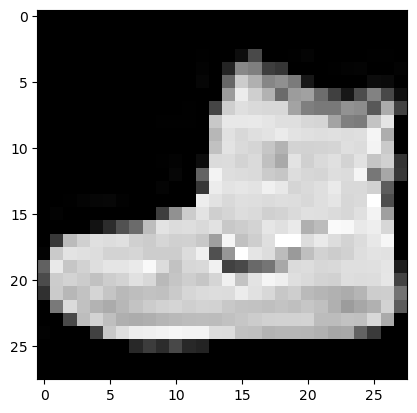

In [172]:
# Теперь построим изображение. Мы сначала сжимаем тензор, а затем передаем его функции imshow().

plt.imshow(image.squeeze(), cmap="gray")
torch.tensor(label)

In [173]:
display_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=10
)

In [174]:
batch = next(iter(display_loader))
print('len:', len(batch))

len: 2


In [175]:
images, labels = batch

print('types:', type(images), type(labels))
print('shapes:', images.shape, labels.shape)

types: <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes: torch.Size([10, 1, 28, 28]) torch.Size([10])


labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


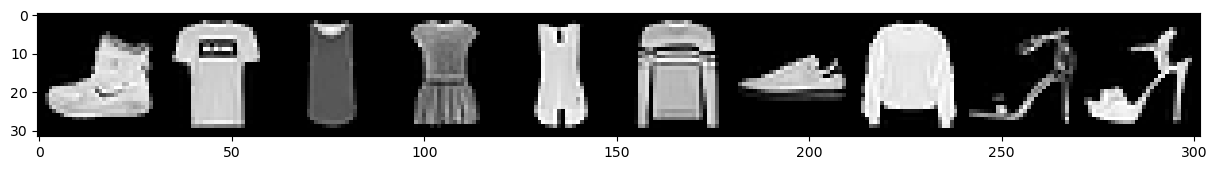

In [176]:
# Чтобы построить пакет изображений, мы можем использовать функцию torchvision.utils.make_grid() для создания сетки

grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1, 2, 0)))

print('labels:', labels)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


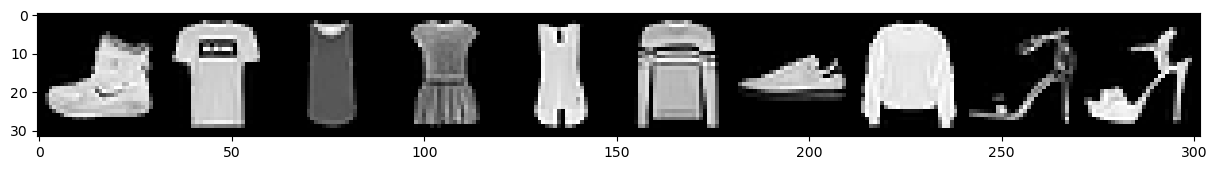

In [177]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 15))
plt.imshow(grid.permute(1, 2, 0))

print('labels:', labels)

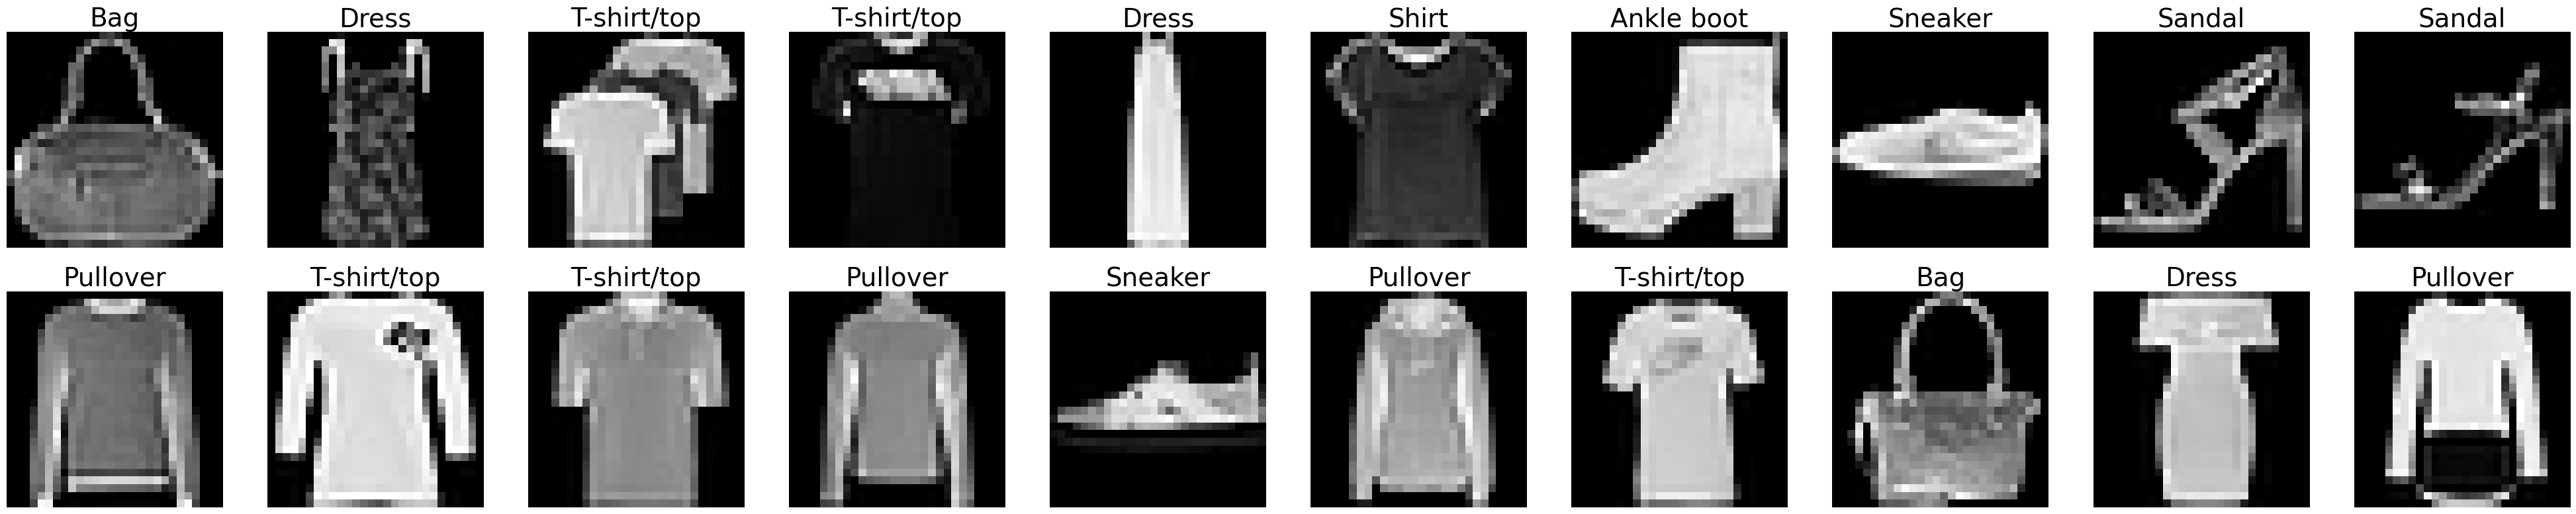

In [ ]:
how_many_to_plot = 20

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

plt.figure(figsize=(50, 50))

for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10, 10, i)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    
    if i >= how_many_to_plot:
        break

plt.show();

# 4.1 Создание нейронных сетей

In [181]:
# Чтобы строить нейронные сети в PyTorch, мы расширяем класс nn.Module. 
# Это требует использования объектно-ориентированного программирования (ООП) в Python.

import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Определите слои здесь
        self.layer1 = nn.Linear(in_features=10, out_features=5)
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        # Определите прямой проход
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

# Пример использования
model = MyModel()
input_data = torch.randn(1, 10)
output = model(input_data)
print(output)

tensor([[-0.1708]], grad_fn=<AddmmBackward0>)


In [182]:
# Пример определения простой нейронной сети с использованием torch.nn
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Пример использования
input_size = 10
hidden_size = 5
output_size = 2

model = SimpleNN(input_size, hidden_size, output_size)
print(model)

SimpleNN(
  (fc1): Linear(in_features=10, out_features=5, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=5, out_features=2, bias=True)
)


# 4.2 Слои

In [183]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # implement the forward pass
        return t

In [ ]:
# self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
# self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

# self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
# self.fc2 = nn.Linear(in_features=120, out_features=60)
# self.out = nn.Linear(in_features=60, out_features=10)

# Слой	    Имя параметра	        Значение параметра	Значение параметра является
# conv1	    in_channels	1	        количеством цветовых каналов во входном изображении.
# conv1	    kernel_size	5	        гиперпараметром.
# conv1	    out_channels 6	        гиперпараметром.
# conv2	    in_channels	6           количеством out_channels в предыдущем слое.
# conv2	    kernel_size	5           гиперпараметром.
# conv2	    out_channels 12	        гиперпараметром (больше, чем в предыдущем сверточном слое).
# fc1	    in_features 12*4*4	    длиной развернутого выхода из предыдущего слоя.
# fc1	    out_features 120	    гиперпараметром.
# fc2	    in_features	120	        количеством out_features предыдущего слоя.
# fc2	    out_features 60	        гиперпараметром (меньше, чем в предыдущем линейном слое).
# out	    in_features 60	        количеством out_channels в предыдущем слое.
# out	    out_features 10	        количеством классов предсказания.

In [184]:
i = 1
while i < 10:
    if i % 2 == 0:
        print("Привет")
    i += 1

Привет
Привет
Привет
Привет
